In [18]:
from matplotlib import pyplot as plt
import numpy as np
import random
import re
import sys
import pprint

In [19]:
def fixCharge(biHeavyAtomList):
    # input is list of "ligand class"
    l1 = biHeavyAtomList[0]
    l2 = biHeavyAtomList[1]
    TotalCharge = l1.charge  # because all charge is stored on the first atom
    bestScore = 10
    bestCharges = [TotalCharge, 0]
    bestBondOrder = 0
    for l1Charge in range(-2, 3):
        for l2Charge in range(-2, 3):
            if TotalCharge == l1Charge + l2Charge:

                numVe1 = (l1.numValE + l1.charge -
                          l1Charge) - 2 * l1.numLP - 2 * l1.numberOfHs
                numVe2 = (
                    l2.numValE - l2Charge) - 2 * l2.numLP - 2 * l2.numberOfHs
                thisScore = abs(numVe1 - numVe2)
                bondOrder = min(numVe1, numVe2)
                if thisScore <= bestScore and bondOrder < 5 and bondOrder >= 0:
                    bestScore = thisScore
                    bestCharges = [l1Charge, l2Charge]
                    bestBondOrder = bondOrder

    return (bestBondOrder, bestCharges, bestScore)

In [68]:
def fixCharge_bident(biHeavyAtomList):
    # input is list of "ligand class"
    l1 = biHeavyAtomList[0]
    l2 = biHeavyAtomList[1]
    l3 = l2
    l4 = l1
    TotalCharge = l1.charge * 2  # because all charge is stored on the first atom
    bestScore = 20
    bestCharges = [TotalCharge / 2, 0, 0, TotalCharge / 2]
    bestBondOrder1 = 0
    bestBondOrder2 = 0
    bestBondOrder3 = bestBondOrder1

    for l1Charge in range(-2, 3):
        for l2Charge in range(-2, 3):
            l3Charge = l2Charge
            l4Charge = l1Charge

            if TotalCharge == l1Charge + l2Charge + l3Charge + l4Charge:

                numVe1 = (l1.numValE + l1.charge -
                          l1Charge) - 2 * l1.numLP - 2 * l1.numberOfHs
                numVe2 = (
                    l2.numValE - l2Charge) - 2 * l2.numLP - 2 * l2.numberOfHs

                numVe3 = numVe2
                numVe4 = numVe1

                bestScore1 = 10
                bestScore2 = 10
                bestScore3 = bestScore1

                thisScore1 = abs(numVe1 - numVe2)
                thisScore2 = abs(numVe2 - numVe3)
                thisScore3 = thisScore1

                bondOrder1 = min(numVe1, numVe2)
                bondOrder2 = min(numVe2, numVe3)
                bondOrder3 = bondOrder1

                if  thisScore1 <= bestScore1 and bondOrder1 < 5 and bondOrder1 >= 0 and \
                    thisScore2 <= bestScore2 and bondOrder2 < 5 and bondOrder2 >= 0 and \
                    thisScore3 <= bestScore3 and bondOrder3 < 5 and bondOrder3 >= 0:
                    bestScore1 = thisScore1
                    bestScore2 = thisScore2
                    bestScore3 = thisScore1
                    bestCharges = [l1Charge, l2Charge, l3Charge, l4Charge]
                    bestBondOrder1 = bondOrder1
                    bestBondOrder2 = bondOrder2
                    bestBondOrder3 = bondOrder1

    return (bestBondOrder1, bestBondOrder2, bestBondOrder3, bestCharges)

In [80]:
# SC
scSeriesMo = ['[Cl-]', '[OH-]', '[S--]', '[OHH]', '[NHHH]',\
               '[PHHH]','[SHH]'] #up to NHHH from spectrochemical series, rest heather's excel

scSeriesDi = [
    '[S-]#[S-]', '[C]#4[N-]', '[N-]#4[C]', '[C+]#[O-]', '[N+]=[O]', '[O-]#[O-]',
    '[O]=[O]'
]
#               ,\
#              '[C][NH]','[C-][P]','[C][PH]','[C][S]','[N][CH]','[N][P]','[N+][S]',\
#              '[O][C]','[O+][N]','[O+][P]','[O++][P]','[P-][C]','[P][CH]','[P][N]',\
#              '[P+][O]','[P+][S]','[S][C]','[S+][N]','[S++][O]','[S+][P]',\
#              '[O-][OH]','[S-][SH]'] # up to O22- is from wiki, rest from heather's table

classicBidentates = ['[NHH+]-[CHH-]#[CHH-]-[NHH+]', '[PHH-][CHH]', '[O-][CHH]']

boDict = {
    0: '-',
    1: '-',
    2: '=',
    3: '#',
    4: '#4',
    -1: 'error1',
    -2: 'error2',
    -3: 'error3'
}

In [72]:
# list of elements with name as key and [total electrons, valence electrons, usually used for bonds] as value
elemList = {
    'C': [6, 4, 4],
    'N': [7, 5, 3],
    'O': [8, 6, 2],
    'P': [15, 5, 3],
    'S': [16, 6, 2]
}  # 'Si':[14,4,4],'Cl':[17,7,1]
components = "CNOPS"
chargeList = range(-2, 3)
# number of H atoms we are sampling through
hList = range(0, 5)


class ligand():
    def __init__(self, name, numberOfHs, charge):
        self.name = name
        self.charge = charge
        self.numberOfHs = numberOfHs
        self.numberOfEs = self.getNumE()
        self.getNumE()

    def print_name(self):
        print(self.name)

    def print_charge(self):
        print(self.charge)

    def print_numberOfHs(self):
        print(self.numberOfHs)

    # CHARGES
    def setCharge(self, charge):
        self.charge = charge
        self.getNumE()

    def incrCharge(self):
        self.charge += 1
        self.getNumE()

    def decrCharge(self):
        self.charge -= 1
        self.getNumE()

    # HYDROGENS
    def setH(self, number):
        self.numberOfHs = number
        self.getNumE()

    def addH(self):
        self.numberOfHs += 1
        self.getNumE()

    def rmH(self):
        self.numberOfHs -= 1
        self.getNumE()

    def getNumE(self):
        self.numLP = int((elemList[self.name][1] - elemList[self.name][2]) / 2)
        self.numValE = elemList[self.name][1]
        self.numE = elemList[self.name][0]
        mod = self.numberOfHs - self.charge
        self.numValE += mod
        self.numE += mod

    def getSmiles(self):
        """Generates a SMILES string. The first row adds hydrogen and the second row charges"""
        self.SMILES = "[" + self.name + "".join(
            ["H" for i in range(0, self.numberOfHs)])
        self.SMILES += "".join([
            "+" if self.charge > 0 else "-"
            for i in range(0, abs(int(self.charge)))
        ]) + "]"

    def testOctetRule(self):
        """Test whether a mono-heavy-atom ligand fulfills the octet rule. Results < 8 means that there are 
        too many electrons, result > 8 means that there are not enough electrons."""
        result = 8 - self.numValE
        return (result)

    def testValenceShell(self):
        """Since open shell complexes are difficult to converge in DFT, we restrict ourselves to closed shell ones."""
        result = int(not self.numValE % 2)
        return (result)

    def score(self):
        """The health score helps to prune the full enumeration by setting open shell ligands to zero and 
        weights ligands with negative charge more than ligands with positive charge. Greater is better in this
        score."""
        #         score = (10-(-1*self.testOctetRule() if self.testOctetRule() < 0 else 0.5*self.testOctetRule())) #*self.testValenceShell() # removed the testValshell bc it is only relevant for the whole ligand
        score = 4 - np.abs(int(self.testOctetRule()))
        return (score)

Name: Charge + octet + CA = Score
[NHHH]: 3 + 4 + 3 = 10
[OH-]: 3 + 4 + 3 = 10
[OHH]: 3 + 4 + 3 = 10
[PHHH]: 3 + 4 + 3 = 10
[S--]: 3 + 4 + 3 = 10
[SHH]: 3 + 4 + 3 = 10
All monoatoms: 125
All scored monoatoms: 50
All wished for monoatoms (>1): 50


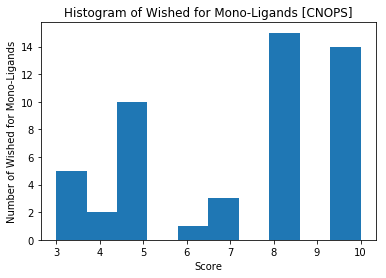

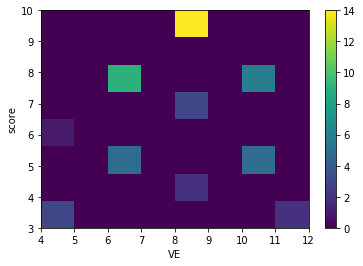

In [6]:
# generate exhaustive output list for mono-ligands
dictMo = {}
scoredDictMo = {}
wishedDictMo = {}

for elem in elemList.keys():
    for charge in chargeList:
        l = ligand(elem, 0, 0)
        l.setCharge(charge)
        for h in hList:
            if h:
                l.addH()
            l.getSmiles()
            dictMo[l.SMILES] = [l.numE,l.numValE,l.numLP,l.charge,l.numberOfHs,\
                                l.testOctetRule(),l.testValenceShell(),l.score()]
            
for name, line in dictMo.items():
    octetScore = line[7]
    charge = line[3]
    numberOfHs = line[4]
    numValE = line[1]
    closedShell = int(not((numValE)%2))
    # Charge: +1 >= charge >= -3
    # Sterics: 4 >= Number of H at Coordinating Atom (CA)
    # Closed Shell only
    if 1 >= charge and charge >= -3 and 4 >= numberOfHs and closedShell == 1: 
        
        # Charge score
        if charge == 1:
            scoreCharge = 0
        if charge <= 0 and charge >= -2:
            scoreCharge = 3
        elif charge == -3:
            scoreCharge = 0

        # CA Sterics Score
        if numberOfHs == 4:
            scoreCa = 0 
        else:
            scoreCa = 3
    
        # Total score
        score = scoreCharge + octetScore + scoreCa
        
        # Dict with only scored ligands
        dictMo[name] = line + [scoreCharge] + [octetScore] + [scoreCa] + [score] 
        scoredDictMo[name] = line + [scoreCharge] + [octetScore] + [scoreCa] + [score] 
        
    else:
        score = 0.0
        dictMo[name] = line + [0] + [0] + [0] + [score]

print("Name: Charge + octet + CA = Score")



histCharge = list() # lists of charge, octet difference, occupancy of CA and score to see histograms
histOctet = list()
histCa = list()
histScore = list()
histVE = list()
thresholdMo = 1 # define threshold for wishedDictMo
for name, props in scoredDictMo.items():        
    histCharge.append(props[-4])
    histOctet.append(props[-3])
    histCa.append(props[-2])
    histScore.append(props[-1])
    histVE.append(props[1])
    
    # Populate the wishedDictMo
    if props[-1] > thresholdMo: 
        wishedDictMo[name] = props
    
    # Evaluate compounds from Spectrochemical Series
    for i in range(0, len(scSeriesMo)):
        if name == scSeriesMo[i]:
            print(name + ': ' +str(props[-4])+" + "+str(props[-3])+" + "+str(props[-2])+' = '+str(props[-1])) 

print('======')
print("All monoatoms: " + str(len(dictMo)))  
print("All scored monoatoms: " + str(len(scoredDictMo)))
print("All wished for monoatoms (>" + str(thresholdMo) + "): " + str(len(wishedDictMo)))
print('======')

plt.xlabel('Score')
plt.ylabel('Number of Wished for Mono-Ligands')
# plt.yscale('log', nonposy='clip')
plt.title('Histogram of Wished for Mono-Ligands ['+ components + "]")
plt.hist(histScore)
# plt.savefig('monoDistr' + components + ".pdf", bbox_inches='tight')
plt.show()


plt.hist2d(histVE, histScore, bins=8)
plt.xlabel('VE')
plt.ylabel('score')
plt.colorbar()
plt.show()


Name, Score = Charge + VSEPR + CA
[C]#4[N-]: 3 + 4 + 3 = 10
[C+]#[O-]: 3 + 4 + 3 = 10
[N-]#4[C]: 3 + 5 + 3 = 11
[N+]=[O]: 0 + 5 + 3 = 8
[O-]#[O-]: 3 + 4 + 3 = 10
[O]=[O]: 3 + 5 + 3 = 11
[S-]#[S-]: 3 + 4 + 3 = 10
All diatoms: 5625
All scored diatoms: 1500
All wished for diatoms (>9): 374


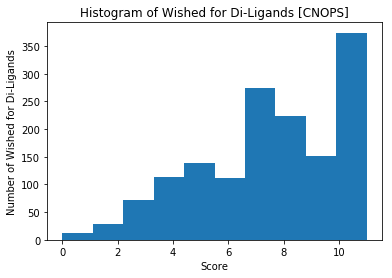

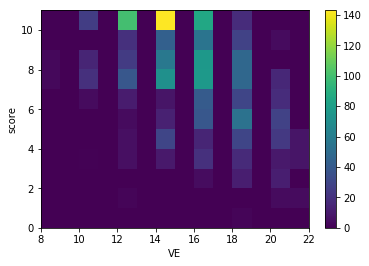

In [26]:
# generate exhaustive output list for di-ligands
dictDi = {}
scoredDictDi = {}
wishedDictDi = {}

for elem1 in elemList.keys():
    for elem2 in elemList.keys():
        for charge1 in range(
                -4, 5
        ):  # charge1 on one but from -4 to +4, because charge is not localized in dft
            for h1 in hList:
                for h2 in hList:
                    l1 = ligand(elem1, 0, 0)
                    l1.setCharge(charge1)
                    l1.setH(h1)
                    l2 = ligand(elem2, 0, 0)
                    l2.setCharge(0)  # charge should distribute from first atom
                    l2.setH(h2)
                    bestBondOrder, bestCharges, bestScore = fixCharge([l1, l2])
                    l1.setCharge(bestCharges[0])
                    l2.setCharge(bestCharges[1])
                    l1.getSmiles()
                    l2.getSmiles()
                    diatomName = ''.join(
                        l1.SMILES + boDict[bestBondOrder] + l2.SMILES)
                    dictDi[diatomName] = [l1.numE, l1.numValE, l1.numLP, l1.charge, l1.numberOfHs, \
                                         l1.testOctetRule(), l1.testValenceShell(), l1.score(),\
                                         l2.numE, l2.numValE, l2.numLP, l2.charge, l2.numberOfHs, \
                                         l2.testOctetRule(), l2.testValenceShell(), l2.score()]

for name, line in dictDi.items():
    charge = line[3] + line[11]
    numberOfHs = line[4]
    numValE1 = line[1]
    numValE2 = line[9]
    numLP1 = line[2]
    numLP2 = line[10]
    closedShell = int(not ((numValE1 + numValE2) % 2))
    # Charge: 1 >= charge >= -4
    # Sterics: 4 >= Number of H at CA
    # Closed Shell only
    if charge <= 1 and numberOfHs < 4 and closedShell == 1:  # overall charge should not exceed +1 and not more than 3 H at CA

        # Charge score
        if charge == 1:
            scoreCharge = 0
        if charge <= 0 and charge >= -2:
            scoreCharge = 3
        elif charge == -3:
            scoreCharge = 1
        elif charge == -4:
            scoreCharge = 0

        # VSEPR score
        usual1 = numValE1 - 2 * numLP1 + charge * 0 - 2 * numberOfHs
        usual2 = numValE2 - 2 * numLP2 + line[11] - 2 * line[12]
        scoreVsepr = 5 - np.abs(usual1 - usual2)

        # CA Sterics Score
        if line[4] == 3:
            scoreCa = 0
        else:
            scoreCa = 3

        #Total score
        score = scoreCharge + scoreVsepr + scoreCa

        # Dict with only scored ligands
        dictDi[name] = line + [scoreCharge] + [scoreVsepr] + [scoreCa
                                                              ] + [score]
        scoredDictDi[name] = line + [scoreCharge] + [scoreVsepr
                                                     ] + [scoreCa] + [score]

    else:
        score = 0.0
        dictDi[name] = line + [0] + [0] + [0] + [score]

print("Name, Score = Charge + VSEPR + CA")

histCharge = list()
histVsepr = list()
histCa = list()
histScore = list()
histVE = list()
thresholdDi = 9

for name, props in scoredDictDi.items():
    histCharge.append(props[-4])
    histVsepr.append(props[-3])
    histCa.append(props[-2])
    histScore.append(props[-1])
    histVE.append(props[1] + props[9])

    # populate the wishedDictDi
    if props[-1] > thresholdDi:
        wishedDictDi[name] = props

    # Evaluate compounds from Spectrochemical Series
    for i in range(0, len(scSeriesDi)):
        if name == scSeriesDi[i]:
            print(name + ': ' + str(props[-4]) + " + " + str(props[-3]) +
                  " + " + str(props[-2]) + ' = ' + str(props[-1]))

print('======')
print("All diatoms: " + str(len(dictDi)))
print("All scored diatoms: " + str(len(scoredDictDi)))
print("All wished for diatoms (>" + str(thresholdDi) + "): " +
      str(len(wishedDictDi)))
print('======')

plt.xlabel('Score')
plt.ylabel('Number of Wished for Di-Ligands')
# plt.yscale('log', nonposy='clip')
plt.title('Histogram of Wished for Di-Ligands [' + components + "]")
plt.hist(histScore)
# plt.savefig('distrDi_' + components + ".pdf", bbox_inches='tight')
plt.show()

plt.hist2d(histVE, histScore, bins=[range(8, 23), range(0, 12)])
plt.xlabel('VE')
plt.ylabel('score')
# plt.ylim((0,10))
# plt.xlim((8,22))
plt.colorbar()
plt.show()


The 1st [.] is always the CA and the 2nd [.] is the bridging atom:

[NHH+]-[CHH-]#[CHH-]-[NHH+]

All bidentates: 5625
All scored bidentates: 1115
All wished for bidentates: 1115


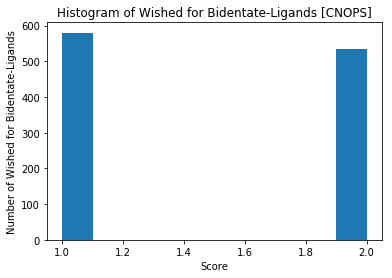

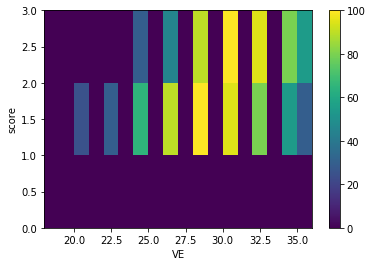

{'[C--]#4[CHH--]#4[CHH--]#4[C--]': [8,
  6,
  0,
  -2,
  0,
  2,
  1,
  2,
  10,
  8,
  0,
  -2,
  2,
  0,
  1,
  4,
  1],
 '[C--]#[CHHH--]#[CHHH--]#[C--]': [8,
  6,
  0,
  -2,
  0,
  2,
  1,
  2,
  11,
  9,
  0,
  -2,
  3,
  -1,
  0,
  3,
  2],
 '[CH--]#4[CHH--]#4[CHH--]#4[CH--]': [9,
  7,
  0,
  -2,
  1,
  1,
  0,
  3,
  10,
  8,
  0,
  -2,
  2,
  0,
  1,
  4,
  1],
 '[CH--]#[CHHH--]#[CHHH--]#[CH--]': [9,
  7,
  0,
  -2,
  1,
  1,
  0,
  3,
  11,
  9,
  0,
  -2,
  3,
  -1,
  0,
  3,
  2],
 '[CHH--]#4[CHH--]#4[CHH--]#4[CHH--]': [10,
  8,
  0,
  -2,
  2,
  0,
  1,
  4,
  10,
  8,
  0,
  -2,
  2,
  0,
  1,
  4,
  1],
 '[CHH--]#[CHHH--]#[CHHH--]#[CHH--]': [10,
  8,
  0,
  -2,
  2,
  0,
  1,
  4,
  11,
  9,
  0,
  -2,
  3,
  -1,
  0,
  3,
  2],
 '[CHHH--]#[CHH--]#4[CHH--]#[CHHH--]': [11,
  9,
  0,
  -2,
  3,
  -1,
  0,
  3,
  10,
  8,
  0,
  -2,
  2,
  0,
  1,
  4,
  1],
 '[CHHH--]#[CHHH--]#[CHHH--]#[CHHH--]': [11,
  9,
  0,
  -2,
  3,
  -1,
  0,
  3,
  11,
  9,
  0,
  -2,
  3,
  -1,
  0,

In [82]:
# Only homo-bidentates
usual = list()
dictBident = dict()
scoredDictBident = dict()
wishedDictBident = dict()

for elem1 in elemList.keys():
    for elem2 in elemList.keys():
        for charge1 in range(-4, 5):
            for h1 in hList:
                for h2 in hList:
                    l1 = ligand(elem1, 0, 0)
                    l1.setCharge(charge1)
                    l1.setH(h1)
                    l2 = ligand(elem2, 0, 0)
                    l2.setCharge(0)
                    l2.setH(h2)
                    bestBondOrder1, bestBondOrder2, bestBondOrder3, bestCharges = fixCharge_bident(
                        [l1, l2])
                    l1.setCharge(bestCharges[0])
                    l2.setCharge(bestCharges[1])
                    l1.getSmiles()
                    l2.getSmiles()
                    diatomName = ''.join(
                        l1.SMILES + boDict[bestBondOrder1] + l2.SMILES +
                        boDict[bestBondOrder2] + l2.SMILES +
                        boDict[bestBondOrder3] + l1.SMILES)
                    dictBident[diatomName] = [
                        l1.numE, l1.numValE, l1.numLP, l1.charge,
                        l1.numberOfHs,
                        l1.testOctetRule(),
                        l1.testValenceShell(),
                        l1.score(), l2.numE, l2.numValE, l2.numLP, l2.charge,
                        l2.numberOfHs,
                        l2.testOctetRule(),
                        l2.testValenceShell(),
                        l2.score()
                    ]

# Figure out how many usuals there are in the nonCAs: {-2,4}.
for name, props in dictBident.items():
    charge1 = props[3]
    charge2 = props[11]
    numberOfHs1 = props[4]
    numberOfHs2 = props[12]
    numValE1 = props[1]
    numValE2 = props[9]
    numLP1 = props[2]
    numLP2 = props[10]

    usual2 = numValE2 - 2 * numLP2 + charge2 - 2 * numberOfHs2

    if charge1 < 2 and charge1 >= -2 and numberOfHs1 < 4 and numberOfHs2 < 4 and usual2 > 0 and usual2 < 3:
        if usual2 == 1:
            scoredDictBident[name] = props + [2]
        elif usual2 == 2:
            scoredDictBident[name] = props + [1]

thresholdBi = 0
histScore = list()
histVE = list()
print("The 1st [.] is always the CA and the 2nd [.] is the bridging atom:\n")
for name, props in scoredDictBident.items():
    histScore.append(props[-1])
    histVE.append(2 * (props[1] + props[9]))

    # Populate the wishedDictBident
    if props[-1] >= thresholdBi:
        wishedDictBident[name] = props

    # Evaluate compounds from Spectrochemical Series
    for i in range(0, len(classicBidentates)):
        if name == classicBidentates[i]:
            print(name)

print('\n======')
print("All bidentates: " + str(len(dictBident)))
print("All scored bidentates: " + str(len(scoredDictBident)))
print("All wished for bidentates: " + str(len(wishedDictBident)))
print('======')

plt.xlabel('Score')
plt.ylabel('Number of Wished for Bidentate-Ligands')
# plt.yscale('log', nonposy='clip')
plt.title('Histogram of Wished for Bidentate-Ligands [' + components + "]")
plt.hist(histScore)
# plt.savefig('monoDistr' + components + ".pdf", bbox_inches='tight')
plt.show()

plt.hist2d(histVE, histScore, bins=[range(18, 37), range(0, 4)])
plt.xlabel('VE')
# plt.xlim((18, 36))
plt.ylabel('score')
plt.colorbar()
plt.show()

scoredDictBident

In [755]:
import collections

gdb4 = "CNOCCCNCOCCCOCCCCCNCCONCOCCCCCOCOCCCCCCOCCOCCCONNCONCCCCCCCOCCCCCCCNNCCNOCCCOCCNOCCOCCCCCCCCCCCNNCCNOCCCOCCNCCCOCNCOCOCOOCCOCCCCCCCOCCOCOCCOCCCCCCCOCNCCOCCCCCCCCCOC"
c_gdb4 = collections.Counter(gdb4)
print(sorted(c_gdb4.items(), key=lambda c_gdb4: c_gdb4[0]))
print(gdb4)
print("\n")

slu1 = str()
# validDictMo can be CNO only if i just regex out the HSP ones. In diatoms I need to reassemble.
for name, prop in validDictMo.items():
    slu1 += re.sub('[\]\[\+\-HSP]','',name)
print(''.join(slu1))
c_slu1 = collections.Counter(slu1)
print(sorted(c_slu1.items(), key=lambda c_slu1: c_slu1[0]))
print("\n")

slu2 = str()
for name, prop in validDictDi.items():
    if 'P' in name or 'S' in name:
        continue
    else:
        slu2 += re.sub('[\]\[\+\-H]','',name)
print(''.join(slu2))
c_slu2 = collections.Counter(slu2)
print(sorted(c_slu2.items(), key=lambda c_slu2: c_slu2[0]))
print("\n")

slu4 = str()
for name, prop in dictBident.items():
    if 'P' in name or 'S' in name:
        continue
    else:
        slu4 += re.sub('[\]\[\+\-H]','',name)
print(''.join(slu4))
c_slu4 = collections.Counter(slu4)
print(sorted(c_slu4.items(), key=lambda c_slu4: c_slu4[0]))


[('C', 116), ('N', 17), ('O', 31)]
CNOCCCNCOCCCOCCCCCNCCONCOCCCCCOCOCCCCCCOCCOCCCONNCONCCCCCCCOCCCCCCCNNCCNOCCCOCCNOCCOCCCCCCCCCCCNNCCNOCCCOCCNCCCOCNCOCOCOOCCOCCCCCCCOCCOCOCCOCCCCCCCOCNCCOCCCCCCCCCOC


CCCCCCCCCCNNNNNNNNNNOOOOOOOOOO
[('C', 10), ('N', 10), ('O', 10)]


CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCOCONCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNCNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONONOOCOCOCOCOCOCO

In [716]:
# plt.xlabel('Part Score')
# plt.ylabel('Number of Ligands')
# # plt.yscale('log', nonposy='clip')
# plt.title('Histogram of Ca origianl ['+ components + "]")
# plt.hist(histVsepr)
# # plt.savefig('histCa' + components + ".pdf", bbox_inches='tight')
# plt.show()

In [317]:
# first version of scoring

# ## only negatively charged ligands
# outputListDiNeg = []
# scoreDiNeg = []
# for line in outputListDi:
#     # only consider negatively charged di-heavy-atoms
#     if line[4] <= 0 or line[13] <= 0:
#         # higher is better
#         scoreCharge = 3 if line[4] + line[13] >= -2 else line[4] + line[13] + 4
#         scoreCharge -= 3 if line[4] + line[13] > 0 else 0

#         usual1 = line[2] - 2*line[3] + line[4] - 2*line[5]
#         usual2 = line[11] - 2*line[12] + line[13] - 2*line[14]
#         scoreVsepr = 5-np.abs(usual1-usual2)
        
#         # THEY ARENT[[since both AB and BA is created, we remove the ones that are A=B]]
#         # the first atom is the CA and we punish >=3 H on it.
#         if line[5] == 4:
#             scoreCa = 0
#         elif line[5] == 3:
#             scoreCa = 1
#         else:
#             scoreCa = 4
        
#         scoreClosedShell = int(not((line[2]+line[11])%2))

#         score = (scoreCharge + scoreVsepr + scoreCa + 0.5 * line[8] + 0.5 * line[17])*scoreClosedShell
#         scoreDiNeg.append(score)
        
#         outputListDiNeg.append([line,score])
#     else:
#         continue

# # gives 5625 (total 15625 * 9/25, since there are 25 comb of [-2,+2], 9 of which contain a pos sign)    

# # for s in outputListDiNeg:
# #     print(*s)
# k=0
# score = np.zeros(len(outputListDiNeg))
# for i in range(0, len(outputListDiNeg)):
#     score[i] = outputListDiNeg[i][1]
#     if score[i] > 3:
#         k += 1
# #         print(outputListDiNeg[i])
# print(k)    

# plt.xlabel('Score')
# plt.ylabel('Number of Ligands')
# plt.title('Histogram of Ligands ['+ components + "]")
# plt.hist(score)
# # plt.savefig('distr_' + components + ".pdf", bbox_inches='tight')
# plt.show()



In [40]:
# create list of isoelectronic ligands and ve-isoelectronig ligands (ligands that have the same amount of VE)
isoList = []  
veList = []
score = []
for line in outputList:
    isoList.append(line[1]) # unsorted list of the total amount of e
    veList.append(line[2]) # unsorted list of the amount of VE
    score.append(line[-1])

isoLigands = {} # dictionary of ligands with key: number of electrons, values: the whole output
d = dict()
for i in np.unique(isoList):
    d[i] = []

for line in outputList:
    d[line[1]].append(line)

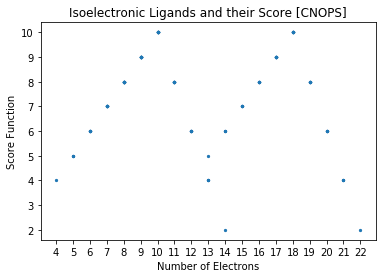

In [41]:
# plot of score function vs number of total electrons. It seems like the number of electrons determines the score fullz.
plt.scatter(isoList, score, s = 5)
plt.xlabel('Number of Electrons')
plt.ylabel('Score Function')
plt.title('Isoelectronic Ligands and their Score ['+ components + "]")
plt.xticks(np.unique(isoList))
# plt.savefig('score_iso_ligands_' + components + ".pdf", bbox_inches='tight')
plt.show()


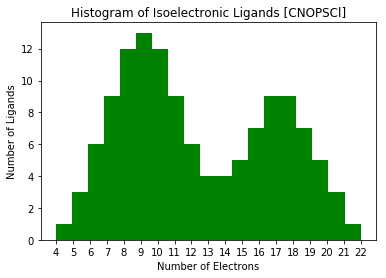

In [73]:
# plot the number of ligands sorted by the number of electrons (isoelectronic structures)

numBins = len(np.unique(isoList))

plt.hist(isoList, bins = numBins, facecolor='green')
plt.xlabel('Number of Electrons')
plt.ylabel('Number of Ligands')
plt.title('Histogram of Isoelectronic Ligands ['+ components + "]")
plt.xticks(np.unique(isoList))
# plt.savefig('hist_iso_ligands_' + components + ".pdf", bbox_inches='tight')
plt.show()


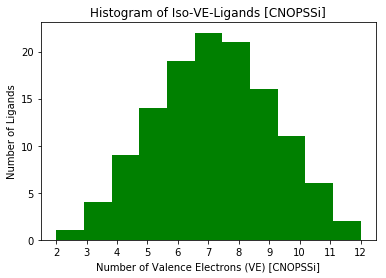

In [78]:
# plot the number of ligands sorted by the number of VE (VE-isoelectronic structures)

numBins = len(np.unique(veList))

plt.hist(veList, bins = numBins, facecolor='green')
plt.xlabel('Number of Valence Electrons (VE) ['+ components + "]")
plt.ylabel('Number of Ligands')
plt.title('Histogram of Iso-VE-Ligands ['+ components + "]")
plt.xticks(np.unique(veList))
# plt.savefig('hist_isove_ligands_' + components + ".pdf", bbox_inches='tight')
plt.show()
